# Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.manifold import MDS

# Load data

In [2]:
# File paths of X
# Tuesdays
train_1_paths_x = ['../../data/Train_X/2023_03_14_data.pq',
              '../../data/Train_X/2023_03_21_data.pq',
              '../../data/Train_X/2023_03_28_data.pq',
              '../../data/Train_X/2023_04_04_data.pq',
              # '../../data/Train_X/2023_04_11_data.pq'
              ]

# Wednesdays
train_2_paths_x = ['../../data/Train_X/2023_03_15_data.pq',
              '../../data/Train_X/2023_03_22_data.pq',
              '../../data/Train_X/2023_03_29_data.pq',
              '../../data/Train_X/2023_04_05_data.pq',
            #   '../../data/Train_X/2023_04_12_data.pq'
              ]

# Thursdays
eval_3_paths_x = ['../../data/Eval_X/2023_03_16_data.pq',
              '../../data/Eval_X/2023_03_23_data.pq',
              '../../data/Eval_X/2023_03_30_data.pq',
              '../../data/Eval_X/2023_04_06_data.pq',
            #   '../../data/Eval_X/2023_04_13_data.pq'
              ]
# Fridays
# unkown


# File paths of y
# Tuesdays
train_1_paths_y = ['../../data/Train_Y/2023_03_14_target.pq',
                '../../data/Train_Y/2023_03_21_target.pq',
                '../../data/Train_Y/2023_03_28_target.pq',
                '../../data/Train_Y/2023_04_04_target.pq',
                # '../../data/Train_Y/2023_04_11_target.pq'
                ]

# Wednesdays
train_2_paths_y = ['../../data/Train_Y/2023_03_15_target.pq',
                '../../data/Train_Y/2023_03_22_target.pq',
                '../../data/Train_Y/2023_03_29_target.pq',
                # '../../data/Train_Y/2023_04_05_target.pq', # Dropped because of anomaly
                # '../../data/Train_Y/2023_04_12_target.pq'
                ]

# Thursdays
eval_3_paths_y = ['../../data/Eval_Y/2023_03_16_target.pq',
                '../../data/Eval_Y/2023_03_23_target.pq',
                '../../data/Eval_Y/2023_03_30_target.pq',
                '../../data/Eval_Y/2023_04_06_target.pq',
                # '../../data/Eval_Y/2023_04_13_target.pq'
                ]
# Fridays
# unkown

# Testset (DO NOT USE)
# Week 5 Tuesday, Wednesday, Thursday
test_paths_x = ['../../data/Train_X/2023_04_11_data.pq',
                '../../data/Train_X/2023_04_12_data.pq',
                '../../data/Eval_X/2023_04_13_data.pq']

test_paths_y = ['../../data/Train_Y/2023_04_11_target.pq',
                 '../../data/Train_Y/2023_04_12_target.pq',
                 '../../data/Eval_Y/2023_04_13_target.pq']

In [3]:
# Load data into all day1, day2, day3 dataframes

train_1_dfs_x = [] # tuesday
train_2_dfs_x = [] # wednesday
eval_3_dfs_x = [] # thursday
# test_4_x is unkown / day 4 / friday
test_dfs_x = [] # includes tuesday, wednesday, thursday

train_1_dfs_y = [] # tuesday
train_2_dfs_y = [] # wednesday
eval_3_dfs_y = [] # thursday
# test_4_y is unkown / day 4 / friday
test_dfs_y = [] # includes tuesday, wednesday, thursday

for path in train_1_paths_x:
    train_1_dfs_x.append(pd.read_parquet(path, engine='pyarrow'))
for path in train_2_paths_x:
    train_2_dfs_x.append(pd.read_parquet(path, engine='pyarrow'))
for path in eval_3_paths_x:
    eval_3_dfs_x.append(pd.read_parquet(path, engine='pyarrow'))
for path in test_paths_x:
    test_dfs_x.append(pd.read_parquet(path, engine='pyarrow'))

for path in train_1_paths_y:
    train_1_dfs_y.append(pd.read_parquet(path, engine='pyarrow'))
for path in train_2_paths_y:
    train_2_dfs_y.append(pd.read_parquet(path, engine='pyarrow'))
for path in eval_3_paths_y:
    eval_3_dfs_y.append(pd.read_parquet(path, engine='pyarrow'))
for path in test_paths_y:
    test_dfs_y.append(pd.read_parquet(path, engine='pyarrow'))

# Tuesdays
train_1_x = pd.concat(train_1_dfs_x, axis=0)
train_1_y = pd.concat(train_1_dfs_y, axis=0)
# Wednesdays
train_2_x = pd.concat(train_2_dfs_x, axis=0)
train_2_y = pd.concat(train_2_dfs_y, axis=0)
# Thursdays
eval_3_x = pd.concat(eval_3_dfs_x, axis=0)
eval_3_y = pd.concat(eval_3_dfs_y, axis=0)
# Testset
test_x = pd.concat(test_dfs_x, axis=0)
test_y = pd.concat(test_dfs_y, axis=0)

## Create Custom Train-Test-Splits

### Full Dataset (excl. test data)

In [4]:
X = pd.concat([train_1_x, train_2_x, eval_3_x], axis=0)
y = pd.concat([train_1_y, train_2_y, eval_3_y], axis=0)

### Holdout Splits (excl. test data)

In [5]:
# Holdout Split
# test: eval_3_x -> eval_3_y
X1 = pd.concat([train_1_x, train_2_x], axis=0)
y1 = pd.concat([train_1_y, train_2_y], axis=0)
# test: train_1_x -> train_1_y
X2 = pd.concat([train_2_x, eval_3_x], axis=0)
y2 = pd.concat([train_2_y, eval_3_y], axis=0)
# test: train_2_x -> train_2_y
X3 = pd.concat([train_1_x, eval_3_x], axis=0)
y3 = pd.concat([train_1_y, eval_3_y], axis=0)

# Single Holdout Training
# Train on Tuesdays: (train_1_x, train_1_y) | train_2_x, eval_3_x -> train_2_y, eval_3_y
# Train on Wednesdays: (train_2_x, train_2_y) | train_1_x, eval_3_x -> train_1_y, eval_3_y
# Train on Thursdays: (eval_3_x, eval_3_y) | train_1_x, train_2_x -> train_1_y, train_2_y

# Test Data (DO NOT USE)
# Train on any data/load any model: (...) | test_x -> test_y

# First Look into Data

In [6]:
print(f"Shape: {X1.shape}")
print(f"Features: {X1.columns}")
X1.iloc[3000:3005, :].head()

Shape: (547208, 14)
Features: Index(['ProzessData_ActData_AB1_Analogs_DX1_MassPressure',
       'ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank',
       'ProzessData_ActData_AB1_Current_DV1_Scraper',
       'ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Speed_DV1_Scraper',
       'ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage',
       'ProzessData_ActData_AB1_Temperature_DS1_WaterPipe',
       'ProzessData_ActData_AB1_Temperature_DU1_WaterTank',
       'ProzessData_ActData_AB1_Temperature_DX1_MassInfeed'],
      dtype='object')


,ProzessData_ActData_AB1_Analogs_DX1_MassPressure,ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank,ProzessData_ActData_AB1_Current_DV1_Scraper,ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Speed_DV1_Scraper,ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage,ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage,ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage,ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage,ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage,ProzessData_ActData_AB1_Temperature_DS1_WaterPipe,ProzessData_ActData_AB1_Temperature_DU1_WaterTank,ProzessData_ActData_AB1_Temperature_DX1_MassInfeed
2023-03-14 01:50:00+00:00,0.92,63.340000,0.0,0.0,0.0,0.0,41.299999,42.099998,41.700001,42.0,42.0,41.849998,42.0,41.900002
2023-03-14 01:50:01+00:00,0.93,63.349998,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.0,41.900002
2023-03-14 01:50:02+00:00,0.94,63.340000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.0,41.900002
2023-03-14 01:50:03+00:00,0.93,63.349998,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.0,41.900002
2023-03-14 01:50:04+00:00,0.92,63.340000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.0,41.900002


In [7]:
# print start-end dates and if any index duplicates
for df in [X1, X2, X3, train_1_x, train_2_x, eval_3_x]:
    print(df.index.min())
    print(df.index.max())
    duplicate_indices = df.index.duplicated()
    print(any(duplicate_indices))

2023-03-14 01:00:00+00:00
2023-04-05 20:00:00+00:00
False
2023-03-15 01:00:00+00:00
2023-04-06 20:00:00+00:00
False
2023-03-14 01:00:00+00:00
2023-04-06 20:00:00+00:00
False


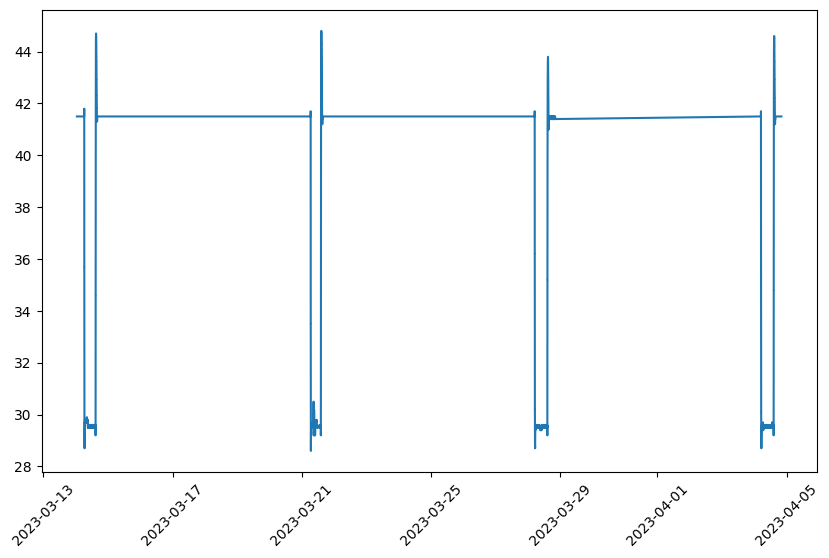

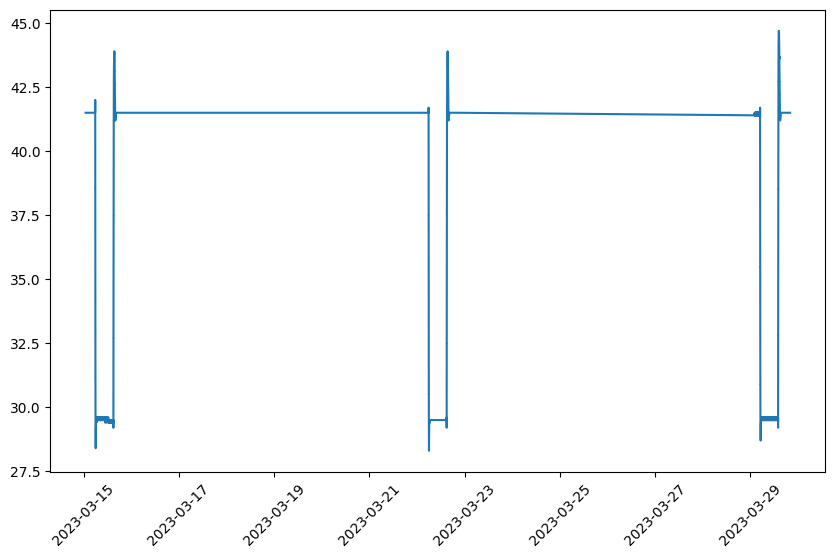

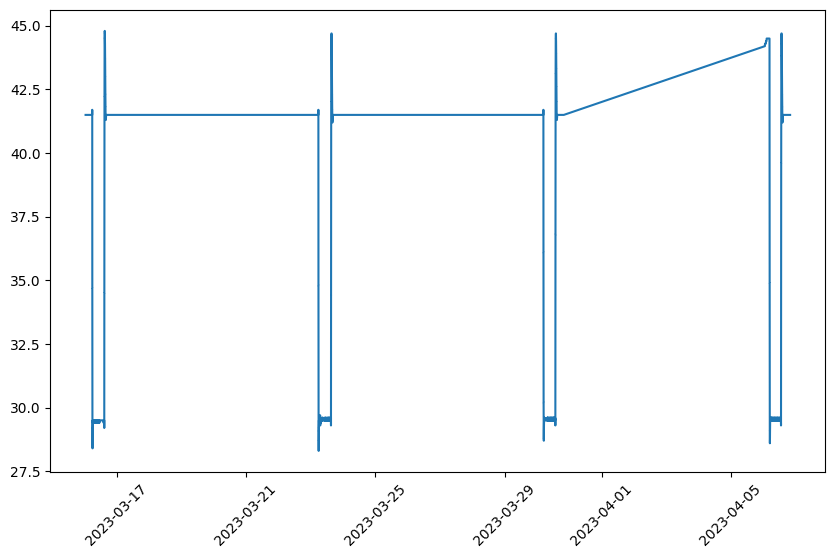

In [13]:
for df in [train_1_y, train_2_y, eval_3_y]:
    plt.figure(figsize=(10, 6))
    plt.plot(df)
    plt.xticks(rotation=45)
    # plt.axvline(datetime.strptime('2023-03-22 00:00', '%Y-%m-%d %H:%M'), color='red', linestyle='--')
    # plt.axvline(datetime.strptime('2023-03-30 00:00', '%Y-%m-%d %H:%M'), color='blue', linestyle='--')
    plt.show()


# Feature Engineering

## Time Features (hour, minute)

In [9]:
test_df = train_1_x.copy()
print(test_df.shape)
print(test_df.columns)
test_df.head()

(273604, 14)
Index(['ProzessData_ActData_AB1_Analogs_DX1_MassPressure',
       'ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank',
       'ProzessData_ActData_AB1_Current_DV1_Scraper',
       'ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Speed_DV1_Scraper',
       'ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage',
       'ProzessData_ActData_AB1_Temperature_DS1_WaterPipe',
       'ProzessData_ActData_AB1_Temperature_DU1_WaterTank',
       'ProzessData_ActData_AB1_Temperature_DX1_MassInfeed'],
      dtype='object')


,ProzessData_ActData_AB1_Analogs_DX1_MassPressure,ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank,ProzessData_ActData_AB1_Current_DV1_Scraper,ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Speed_DV1_Scraper,ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage,ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage,ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage,ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage,ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage,ProzessData_ActData_AB1_Temperature_DS1_WaterPipe,ProzessData_ActData_AB1_Temperature_DU1_WaterTank,ProzessData_ActData_AB1_Temperature_DX1_MassInfeed
2023-03-14 01:00:00+00:00,0.92,63.349998,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.099998,41.900002
2023-03-14 01:00:01+00:00,0.93,63.340000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.099998,41.900002
2023-03-14 01:00:02+00:00,0.93,63.340000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,42.000000,41.900002
2023-03-14 01:00:03+00:00,0.92,63.349998,0.0,0.0,0.0,0.0,41.299999,41.900002,41.700001,42.0,42.0,41.849998,42.000000,41.900002
2023-03-14 01:00:04+00:00,0.92,63.340000,0.0,0.0,0.0,0.0,41.299999,41.900002,41.700001,42.0,42.0,41.849998,42.000000,41.900002


In [10]:
# add features: hour of day, minute of day
def add_time_features(df):
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    daytime_arr = []
    for idx in df.index:
        if df.loc[idx, "hour"] >= 6 and df.loc[idx, "hour"] <= 18:
            daytime_arr.append(1)
        else:
            daytime_arr.append(0)

    df['day_time'] = daytime_arr
    df['night_time'] = 1 - df['day_time']
    return df

test_df = add_time_features(test_df)

In [12]:
print(test_df.shape)
print(test_df.columns)
test_df.iloc[29998:30003,-4:]

(273604, 18)
Index(['ProzessData_ActData_AB1_Analogs_DX1_MassPressure',
       'ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank',
       'ProzessData_ActData_AB1_Current_DV1_Scraper',
       'ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Speed_DV1_Scraper',
       'ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd',
       'ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage',
       'ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage',
       'ProzessData_ActData_AB1_Temperature_DS1_WaterPipe',
       'ProzessData_ActData_AB1_Temperature_DU1_WaterTank',
       'ProzessData_ActData_AB1_Temperature_DX1_MassInfeed', 'hour', 'minute',
       'day_time', 'night_time'],
      dtype='object')


,hour,minute,day_time,night_time
2023-03-14 09:19:58+00:00,9,19,1,0
2023-03-14 09:19:59+00:00,9,19,1,0
2023-03-14 09:20:00+00:00,9,20,1,0
2023-03-14 09:20:01+00:00,9,20,1,0
2023-03-14 09:20:02+00:00,9,20,1,0


In [14]:
# apply to all custom splits: X1, X2, X3
X = add_time_features(X)
X1 = add_time_features(X1)
X2 = add_time_features(X2)
X3 = add_time_features(X3)
train_1_x = add_time_features(train_1_x)
train_2_x = add_time_features(train_2_x)
eval_3_x = add_time_features(eval_3_x)

X.iloc[29998:30003,-2:]

,day_time,night_time
2023-03-14 09:19:58+00:00,1,0
2023-03-14 09:19:59+00:00,1,0
2023-03-14 09:20:00+00:00,1,0
2023-03-14 09:20:01+00:00,1,0
2023-03-14 09:20:02+00:00,1,0


# Look into Data again

### Correlation Matrix

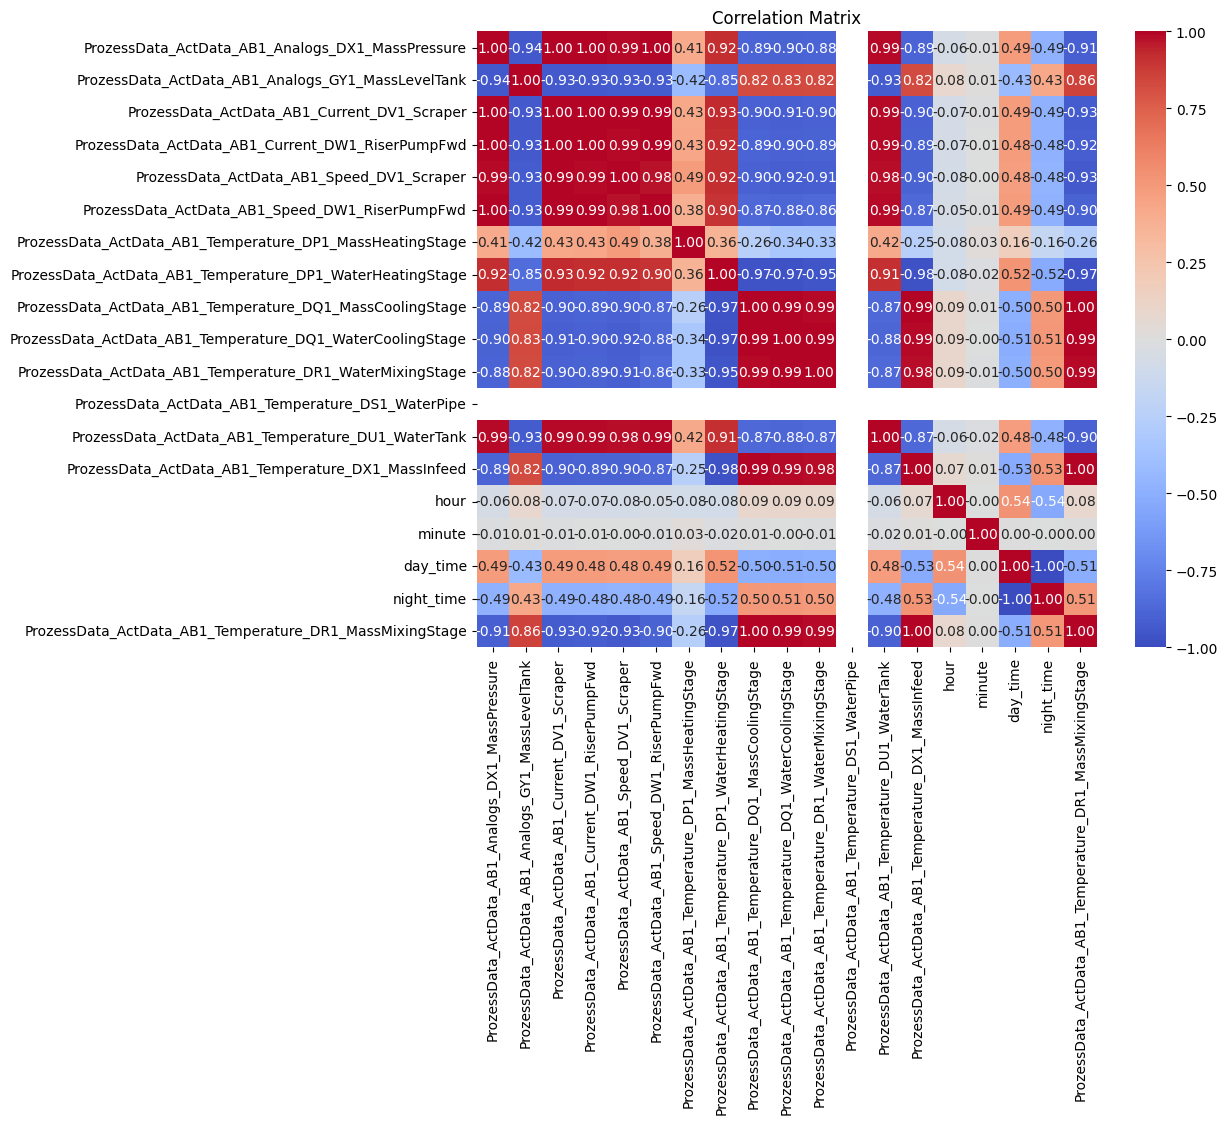

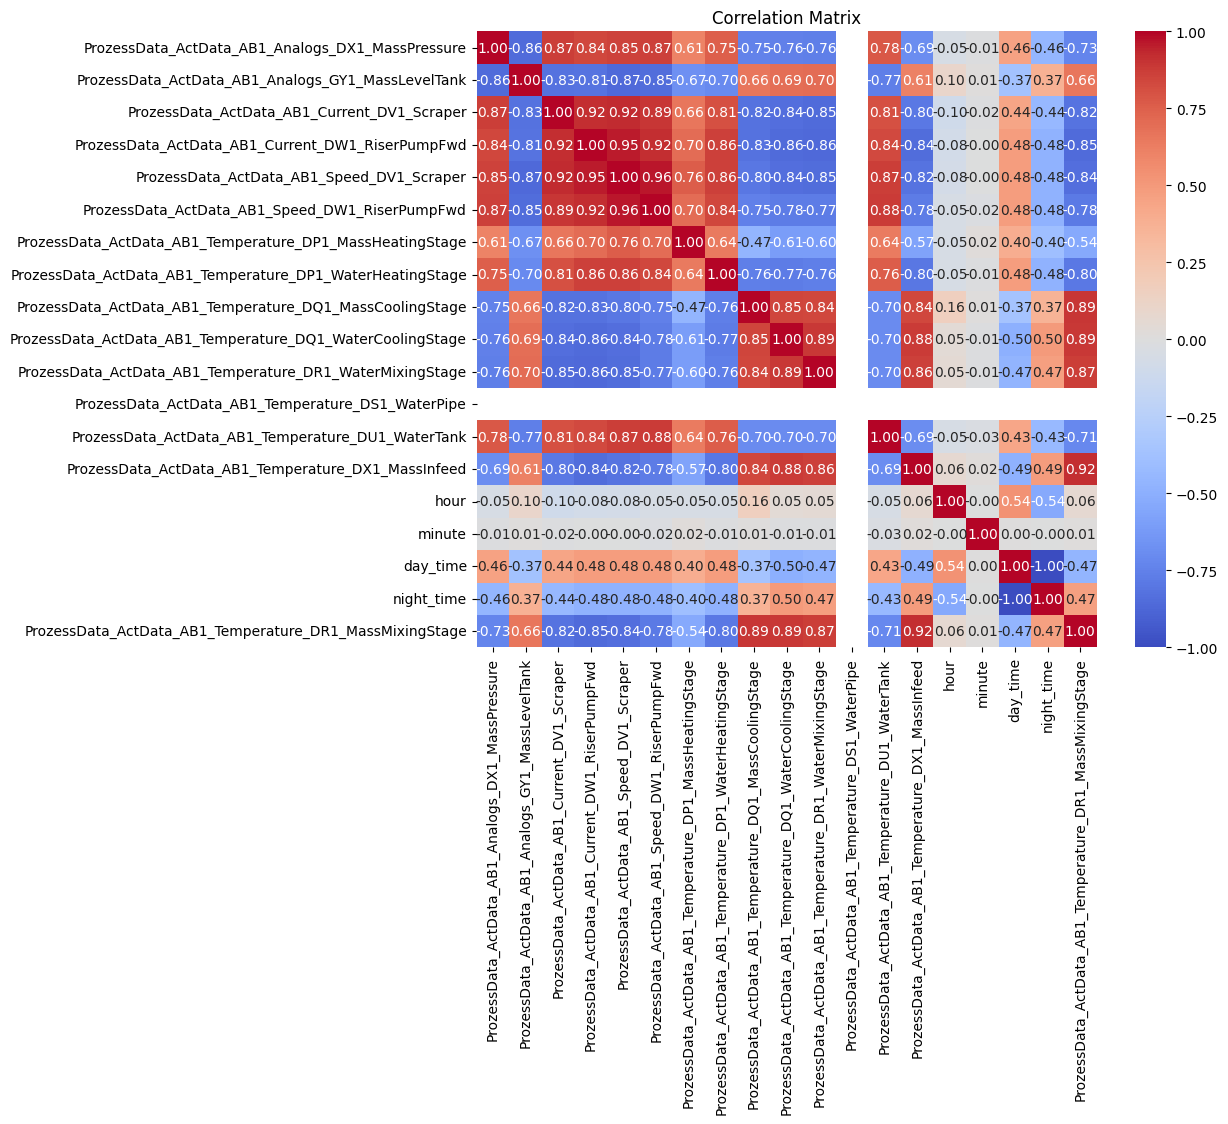

In [17]:
for cur_type in ['pearson', 'spearman']:
    X_with_y = pd.concat([X, y], axis=1)
    correlation_matrix = X_with_y.corr(method=cur_type)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()

### PCA / EVP

In [20]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(X)

# Calculate non-cumulative PVE
non_cumulative_pve = pca.explained_variance_ratio_

# Calculate cumulative PVE
cumulative_pve = np.cumsum(non_cumulative_pve)

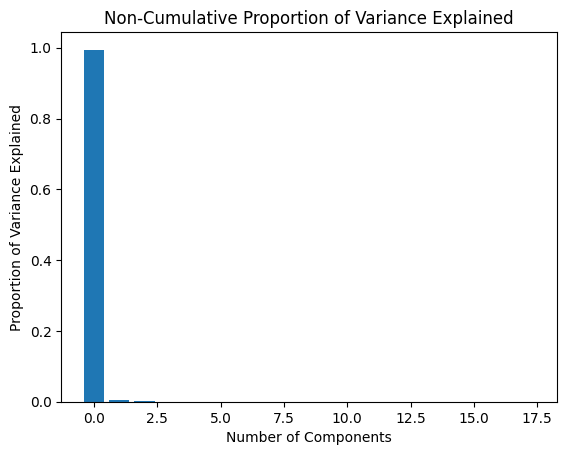

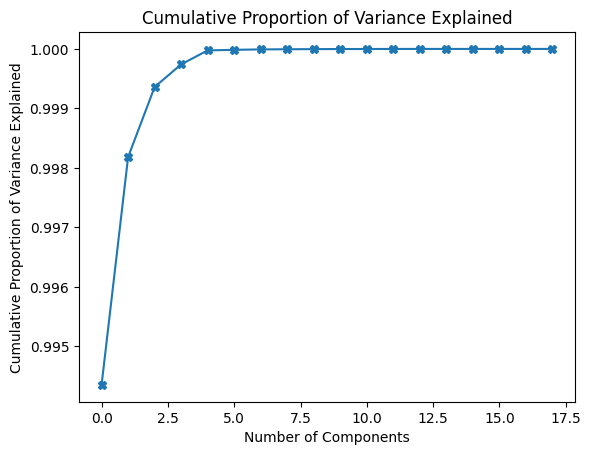

In [21]:
# Plot non-cumulative PVE
plt.bar(range(len(non_cumulative_pve)), non_cumulative_pve)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Non-Cumulative Proportion of Variance Explained')
plt.show()

# Plot cumulative PVE
plt.plot(cumulative_pve, marker="X")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Proportion of Variance Explained')
plt.show()

### MDS

In [23]:
# Create MDS object
mds = MDS(n_components=2, dissimilarity='euclidean')

# Perform MDS
X_with_y_mds = mds.fit_transform(X_with_y)

# Plot MDS results
plt.scatter(X_with_y_mds[:, 0], X_with_y_mds[:, 1])
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('Metric MDS')
plt.show()

# Export data as .pq Files

In [26]:
for df in [X, X1, X2, X3, train_1_x, train_2_x, eval_3_x]:
    X.to_parquet('../../data/processed/full_data.pq', index=True)
    X1.to_parquet('../../data/processed/holdout_1.pq', index=True)
    X2.to_parquet('../../data/processed/holdout_2', index=True)
    X3.to_parquet('../../data/processed/holdout_3.pq', index=True)
    train_1_x.to_parquet('../../data/processed/tuesdays.pq', index=True)
    train_2_x.to_parquet('../../data/processed/wednesdays.pq', index=True)
    eval_3_x.to_parquet('../../data/processed/thursday.pq', index=True)